In [3]:
%matplotlib inline
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import csr_matrix, hstack
from os.path import join, isfile

import matplotlib.pyplot as plt

In [4]:
bin_NaN_data_path = '/home/ymm/kaggle/bosch/data_2_bins_xgb_combined_models/data_bin_NaN_models'
bin_0_data_path = '/home/ymm/kaggle/bosch/data_2_bins_xgb_combined_models/data_bin_0_models'
bin_1_data_path = '/home/ymm/kaggle/bosch/data_2_bins_xgb_combined_models/data_bin_1_models'

In [5]:
def collect_feature_names(data_path, fea_name='feature', thres_name = None, thres = 10):
    csv_files = [f for f in os.listdir(data_path) if '.csv' in f]
    feature_names = set()
    for file_name in csv_files:
        data = pd.read_csv(join(data_path, file_name), index_col=0)
        if thres_name is None:
            feature_names = feature_names.union(data[fea_name])
        else:
            feature_names = feature_names.union(data.loc[data[thres_name] > thres, fea_name])
            
    return feature_names


def combine_feature_score(data_path, fea_name='feature', score_name = None):
    csv_files = [f for f in os.listdir(data_path) if '.csv' in f]
    fea_score = None
    
    for i, file_name in enumerate(csv_files):
        data = pd.read_csv(join(data_path, file_name), index_col=0)
        data = data.set_index([fea_name])
        col_name = '{}_{}'.format(score_name, i)
        
        if fea_score is None:
            fea_score = pd.DataFrame()
        
        fea_score[col_name] = data[score_name]

            #fea_score = pd.merge(fea_score, data, how='outer', left_index=True, right_index=True)
            
    return fea_score

In [6]:
## count all the features
bin_0_collected_names = collect_feature_names(bin_0_data_path)      
bin_1_collected_names = collect_feature_names(bin_1_data_path)      
bin_NaN_collected_names = collect_feature_names(bin_NaN_data_path)

In [7]:
## count only the important features
bin_0_collected_names = collect_feature_names(bin_0_data_path, 'feature', 'fscore')      
bin_1_collected_names = collect_feature_names(bin_1_data_path, 'feature', 'fscore')      
bin_NaN_collected_names = collect_feature_names(bin_NaN_data_path, 'feature', 'fscore')

In [124]:
print len(bin_0_collected_names), len(bin_1_collected_names), len(bin_NaN_collected_names)

331 318 568


In [125]:
print len(bin_1_collected_names.intersection(bin_NaN_collected_names)), len(bin_0_collected_names.intersection(bin_NaN_collected_names)), len(bin_0_collected_names.intersection(bin_1_collected_names)) 

180 177 293


In [126]:
full_union = bin_0_collected_names.union(bin_1_collected_names).union(bin_NaN_collected_names)

In [ ]:
len(full_union)

In [167]:
## count only the important features
bin_0_collected_names = collect_feature_names(bin_0_data_path, 'feature', 'fscore', 200)      
bin_1_collected_names = collect_feature_names(bin_1_data_path, 'feature', 'fscore', 200)      
bin_NaN_collected_names = collect_feature_names(bin_NaN_data_path, 'feature', 'fscore', 200)

print len(bin_0_collected_names), len(bin_1_collected_names), len(bin_NaN_collected_names)
print len(bin_1_collected_names.intersection(bin_NaN_collected_names)), len(bin_0_collected_names.intersection(bin_NaN_collected_names)), len(bin_0_collected_names.intersection(bin_1_collected_names)) 

79 76 49
25 27 54


In [157]:
tmp1 = bin_1_collected_names.intersection(bin_0_collected_names)
tmp2 = bin_0_collected_names.intersection(bin_NaN_collected_names)

In [158]:
tmp1

{'L0_S0_F0',
 'L0_S0_F16',
 'L0_S0_F18',
 'L0_S0_F2',
 'L0_S0_F20',
 'L0_S0_F22',
 'L0_S0_F4',
 'L0_S11_F286',
 'L0_S11_F294',
 'L0_S1_F24',
 'L0_S1_F28',
 'L0_S2_F36',
 'L0_S2_F44',
 'L0_S2_F64',
 'L0_S3_F100',
 'L0_S3_F72',
 'L0_S3_F80',
 'L0_S3_F96',
 'L0_S4_F104',
 'L0_S5_F116',
 'L0_S6_F122',
 'L0_S7_F138',
 'L0_S7_F142',
 'L0_S9_F160',
 'L3_S29_F3327',
 'L3_S29_F3330',
 'L3_S29_F3336',
 'L3_S29_F3345',
 'L3_S29_F3348',
 'L3_S29_F3479',
 'L3_S30_F3534',
 'L3_S30_F3554',
 'L3_S30_F3574',
 'L3_S30_F3704',
 'L3_S30_F3744',
 'L3_S30_F3749',
 'L3_S30_F3754',
 'L3_S30_F3759',
 'L3_S30_F3769',
 'L3_S30_F3774',
 'L3_S30_F3804',
 'L3_S30_F3809',
 'L3_S30_F3819',
 'L3_S30_F3829',
 'L3_S32_D3852',
 'L3_S32_F3850',
 'L3_S32_F3854',
 'L3_S33_D3856',
 'L3_S33_F3855',
 'L3_S33_F3857',
 'L3_S33_F3859',
 'L3_S33_F3865',
 'L3_S36_F3920',
 'start_time'}

In [35]:
bin_NaN_imp = combine_feature_score(bin_NaN_data_path, 'feature', 'fscore')

In [37]:
NaN_LR_important_features = [u'L3_S49_F4206', u'L0_S22_F546', u'L3_S31_F3834', 
                             u'L3_S29_F3464', u'L3_S50_F4243', u'L2_S28_F3222', 
                             u'L1_S25_F2231', u'L1_S24_F1581',u'L1_S24_F1672',
                             u'L3_S32_F3850']

In [38]:
for feature in NaN_LR_important_features:
    print bin_NaN_imp.ix[feature]

fscore_0    2.0
fscore_1    NaN
fscore_2    NaN
fscore_3    NaN
fscore_4    3.0
Name: L3_S49_F4206, dtype: float64
fscore_0    149.0
fscore_1    128.0
fscore_2    152.0
fscore_3    153.0
fscore_4    142.0
Name: L0_S22_F546, dtype: float64
fscore_0    36.0
fscore_1    43.0
fscore_2    41.0
fscore_3    40.0
fscore_4    37.0
Name: L3_S31_F3834, dtype: float64
fscore_0    492.0
fscore_1    527.0
fscore_2    490.0
fscore_3    512.0
fscore_4    528.0
Name: L3_S29_F3464, dtype: float64
fscore_0    23.0
fscore_1    16.0
fscore_2     8.0
fscore_3    15.0
fscore_4    21.0
Name: L3_S50_F4243, dtype: float64
fscore_0    6.0
fscore_1    3.0
fscore_2    1.0
fscore_3    5.0
fscore_4    1.0
Name: L2_S28_F3222, dtype: float64
fscore_0    6.0
fscore_1    8.0
fscore_2    9.0
fscore_3    9.0
fscore_4    9.0
Name: L1_S25_F2231, dtype: float64
fscore_0    65.0
fscore_1    57.0
fscore_2    49.0
fscore_3    62.0
fscore_4    76.0
Name: L1_S24_F1581, dtype: float64
fscore_0    83.0
fscore_1    82.0
fscore_2    

## Exam the important features from other mdoels
        1. LR
        2. ET and RF

In [19]:
bin_0_imp = combine_feature_score(bin_0_data_path, 'feature', 'fscore')
bin_NaN_imp = combine_feature_score(bin_NaN_data_path, 'feature', 'fscore')

In [32]:
NaN_data_ET_important_features = ['L3_S32_F3850', u'L3_S32_F3854', u'L3_S32_F3851']

regular_data_ET_important_features = ['L3_S33_F3867', 'L3_S33_F3873', 'L3_S32_F3854',
                                      'L3_S32_F3850', 'L3_S32_F3851']

In [33]:
bin_NaN_imp.index

Index([u'L1_S24_F1260', u'L1_S25_F2031', u'L1_S25_F2193', u'L1_S24_F821',
       u'L3_S47_F4141', u'L1_S24_F1188', u'L3_S50_F4253', u'L1_S25_F2597',
       u'L1_S25_F2433', u'L1_S25_F2732',
       ...
       u'L0_S12_F350', u'L3_S29_F3464', u'L1_S24_F1723', u'L3_S32_F3850',
       u'L3_S38_F3960', u'L3_S29_F3407', u'L3_S33_F3855', u'L3_S33_F3857',
       u'L3_S33_F3865', u'L3_S32_F3854'],
      dtype='object', name=u'feature', length=812)

In [34]:
for feature in NaN_data_ET_important_features:
    if feature not in bin_NaN_imp.index:
        print 'missing feature {} from xgboost'.format(feature)
    else:
        print bin_NaN_imp.ix[feature]

fscore_0    551.0
fscore_1    510.0
fscore_2    513.0
fscore_3    516.0
fscore_4    474.0
Name: L3_S32_F3850, dtype: float64
fscore_0    1781.0
fscore_1    1724.0
fscore_2    1744.0
fscore_3    1748.0
fscore_4    1757.0
Name: L3_S32_F3854, dtype: float64
fscore_0    179.0
fscore_1    182.0
fscore_2    172.0
fscore_3    158.0
fscore_4    162.0
Name: L3_S32_F3851, dtype: float64


In [17]:
for feature in regular_data_ET_important_features:
    print bin_0_imp.ix[feature]

fscore_0    13.0
fscore_1    11.0
fscore_2     8.0
fscore_3    11.0
fscore_4    14.0
Name: L3_S33_F3867, dtype: float64
fscore_0    21.0
fscore_1    19.0
fscore_2    26.0
fscore_3    31.0
fscore_4    28.0
Name: L3_S33_F3873, dtype: float64
fscore_0    1272.0
fscore_1    1316.0
fscore_2    1218.0
fscore_3    1235.0
fscore_4    1190.0
Name: L3_S32_F3854, dtype: float64
fscore_0    296.0
fscore_1    294.0
fscore_2    274.0
fscore_3    293.0
fscore_4    271.0
Name: L3_S32_F3850, dtype: float64
fscore_0    129.0
fscore_1    115.0
fscore_2    141.0
fscore_3    130.0
fscore_4    143.0
Name: L3_S32_F3851, dtype: float64


In [11]:
bin_0_imp.ix['L3_S31_F3834']

fscore_0    22.0
fscore_1    27.0
fscore_2    15.0
fscore_3    29.0
fscore_4    19.0
Name: L3_S31_F3834, dtype: float64

In [10]:
bin_0_imp.ix['L3_S32_F3851']

fscore_0    129.0
fscore_1    115.0
fscore_2    141.0
fscore_3    130.0
fscore_4    143.0
Name: L3_S32_F3851, dtype: float64

In [6]:
bin_0_imp.tail()

,fscore_0,fscore_1,fscore_2,fscore_3,fscore_4
feature,,,,,
L3_S33_F3857,743,740.0,737.0,771.0,694.0
L0_S1_F28,743,712.0,748.0,725.0,725.0
L0_S0_F20,771,780.0,774.0,769.0,758.0
L3_S32_F3854,1272,1316.0,1218.0,1235.0,1190.0
start_time,1342,1316.0,1183.0,1302.0,1265.0


In [142]:
bin_0_data_files =  [f for f in os.listdir(bin_0_data_path) if '.csv' in f]
data = pd.read_csv(join(bin_0_data_path, bin_0_csv_files[0]), index_col=0)
tmp = data.loc[data['fscore']>10 ,'feature']

In [153]:
data.tail(30)

,feature,fscore,norm_fscore
782,L1_S24_F1604,238,0.005364
783,L1_S24_F1695,246,0.005544
784,L3_S30_F3749,255,0.005747
785,L3_S30_F3774,256,0.005770
786,L0_S12_F346,266,0.005995
787,L3_S30_F3744,269,0.006063
788,L3_S29_F3373,273,0.006153
789,L3_S30_F3809,274,0.006175
790,L3_S30_F3704,277,0.006243
791,L3_S30_F3554,283,0.006378


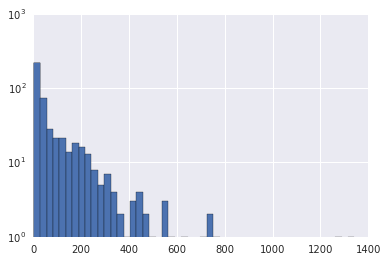

In [147]:
plt.hist(data['fscore'], bins=50)
plt.gca().set_yscale("log")

In [166]:
print data.shape
data.head()

(812, 3)


,feature,fscore,norm_fscore
0,L1_S24_F1260,1,0.000023
1,L1_S25_F2031,1,0.000023
2,L1_S25_F2193,1,0.000023
3,L1_S24_F821,1,0.000023
4,L3_S47_F4141,1,0.000023


In [164]:
tmp = data.feature.apply(lambda x: x.split('_')[2][0])

In [165]:
tmp.value_counts()

F    812
Name: feature, dtype: int64

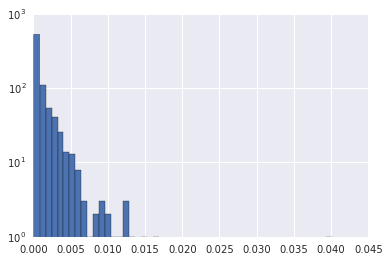

In [151]:
plt.hist(data['norm_fscore'], bins=50)
plt.gca().set_yscale("log")

In [148]:
bin_NaN_data_files =  [f for f in os.listdir(bin_0_data_path) if '.csv' in f]
data = pd.read_csv(join(bin_NaN_data_path, bin_NaN_data_files[0]), index_col=0)
tmp = data.loc[data['fscore']>10 ,'feature']

In [152]:
data.tail(20)

,feature,fscore,norm_fscore
792,L3_S29_F3351,288,0.006491
793,L3_S29_F3479,312,0.007032
794,L3_S30_F3804,313,0.007054
795,L3_S30_F3754,331,0.007460
796,L1_S24_F1844,359,0.008091
797,L3_S38_F3956,383,0.008632
798,L3_S30_F3759,411,0.009263
799,L3_S29_F3339,419,0.009443
800,L1_S24_F1846,421,0.009488
801,L3_S33_F3859,431,0.009714


In [127]:
len(full_union)

736